# Workflow
1. Install and Import necessary Library.
2. DataLoading.
3. Find missing values.
4. Data Preprocessing.
5. Train Test Split.
6. Model building and training.
7. Model Evaluation.
8. Visualize the actual values and predicted values.

# 1. Install and Import necessary Library.

I already installed all important library. So i will import only.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Dataloading

In [2]:
df = pd.read_csv('weather_prediction_dataset.csv')
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


# 3. Find out missing Values.

In [3]:
# check null values.

df.isnull().sum()

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64

In [4]:
# convert numerical value into date.

df['DATE'] = pd.to_datetime(df['DATE'].astype(str), format = '%Y%m%d')
df.head(5)

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,2000-01-01,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,2000-01-02,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,2000-01-03,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,2000-01-04,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,2000-01-05,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [5]:
df['DATE'] = df['DATE'].dt.strftime('%d-%m-%Y')
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,01-01-2000,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,02-01-2000,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,03-01-2000,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,04-01-2000,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,05-01-2000,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [6]:
# Show columns
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)

In [7]:
# Display column summary and statistics.
# check numerical columns

df.describe() # all are numerical columns.

,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,15.536782,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,8.721323,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,-5.700000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,8.700000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,15.800000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,22.300000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,38.600000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


# 4. Data Preprocessing

In [8]:
# 1. we have no missing values, if any column contain null value then drop.

df = df.dropna()

In [9]:
# 2. Perform on-hot encoding on categorical data or variable.

df = pd.get_dummies(df, drop_first = True)
df

,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,DATE_31-12-2000,DATE_31-12-2001,DATE_31-12-2002,DATE_31-12-2003,DATE_31-12-2004,DATE_31-12-2005,DATE_31-12-2006,DATE_31-12-2007,DATE_31-12-2008,DATE_31-12-2009
0,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,...,False,False,False,False,False,False,False,False,False,False
1,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,...,False,False,False,False,False,False,False,False,False,False
2,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,...,False,False,False,False,False,False,False,False,False,False
3,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,...,False,False,False,False,False,False,False,False,False,False
4,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,4.8,...,False,False,False,False,False,False,False,False,False,False
3650,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,10.0,...,False,False,False,False,False,False,False,False,False,False
3651,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,11.5,...,False,False,False,False,False,False,False,False,False,False
3652,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,7.9,...,False,False,False,False,False,False,False,False,False,True


In [10]:
# 3. Features Selection
# Define features and target variable.

X = df.drop('BASEL_temp_mean', axis = 1)
y = df['BASEL_temp_mean']

# 5. Split the data

In [11]:
from sklearn.model_selection import train_test_split

# split the data into training and test data.
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)
len(X_train), len(X_test), len(y_train), len(y_test)

(2923, 731, 2923, 731)

In [12]:
print(type(X_train), X_train.dtypes)

<class 'pandas.core.frame.DataFrame'> MONTH                       int64
BASEL_cloud_cover           int64
BASEL_humidity            float64
BASEL_pressure            float64
BASEL_global_radiation    float64
                           ...   
DATE_31-12-2005              bool
DATE_31-12-2006              bool
DATE_31-12-2007              bool
DATE_31-12-2008              bool
DATE_31-12-2009              bool
Length: 3816, dtype: object


In [13]:
X_train = X_train.astype(int)
print(X_train.dtypes)
print('-' * 90)

y_train = y_train.astype(int)
print(y_train.dtypes)

MONTH                     int64
BASEL_cloud_cover         int64
BASEL_humidity            int64
BASEL_pressure            int64
BASEL_global_radiation    int64
                          ...  
DATE_31-12-2005           int64
DATE_31-12-2006           int64
DATE_31-12-2007           int64
DATE_31-12-2008           int64
DATE_31-12-2009           int64
Length: 3816, dtype: object
------------------------------------------------------------------------------------------
int64


In [14]:
X_test = X_test.astype(int)
print(X_test.dtypes)
print('-' * 90)

y_test = y_test.astype(int)
print(y_test.dtypes)

MONTH                     int64
BASEL_cloud_cover         int64
BASEL_humidity            int64
BASEL_pressure            int64
BASEL_global_radiation    int64
                          ...  
DATE_31-12-2005           int64
DATE_31-12-2006           int64
DATE_31-12-2007           int64
DATE_31-12-2008           int64
DATE_31-12-2009           int64
Length: 3816, dtype: object
------------------------------------------------------------------------------------------
int64


# 6. Build and Train the Model

In [15]:
from sklearn.linear_model import LinearRegression

# initialize the model
model = LinearRegression()

# Train the model.
model.fit(X_train, y_train)

LinearRegression()

# 7. Model Evaluation

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# model prediction
y_pred = model.predict(X_test)

#  Calcualte Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# Calcualte R-Squared Score
r2 = r2_score(y_test, y_pred)
print(f'R-Squared Score: {r2}')

Mean Squared Error: 0.3800464696817971
R-Squared Score: 0.9927435651201182


# 8. Visualize visualize visualize the result

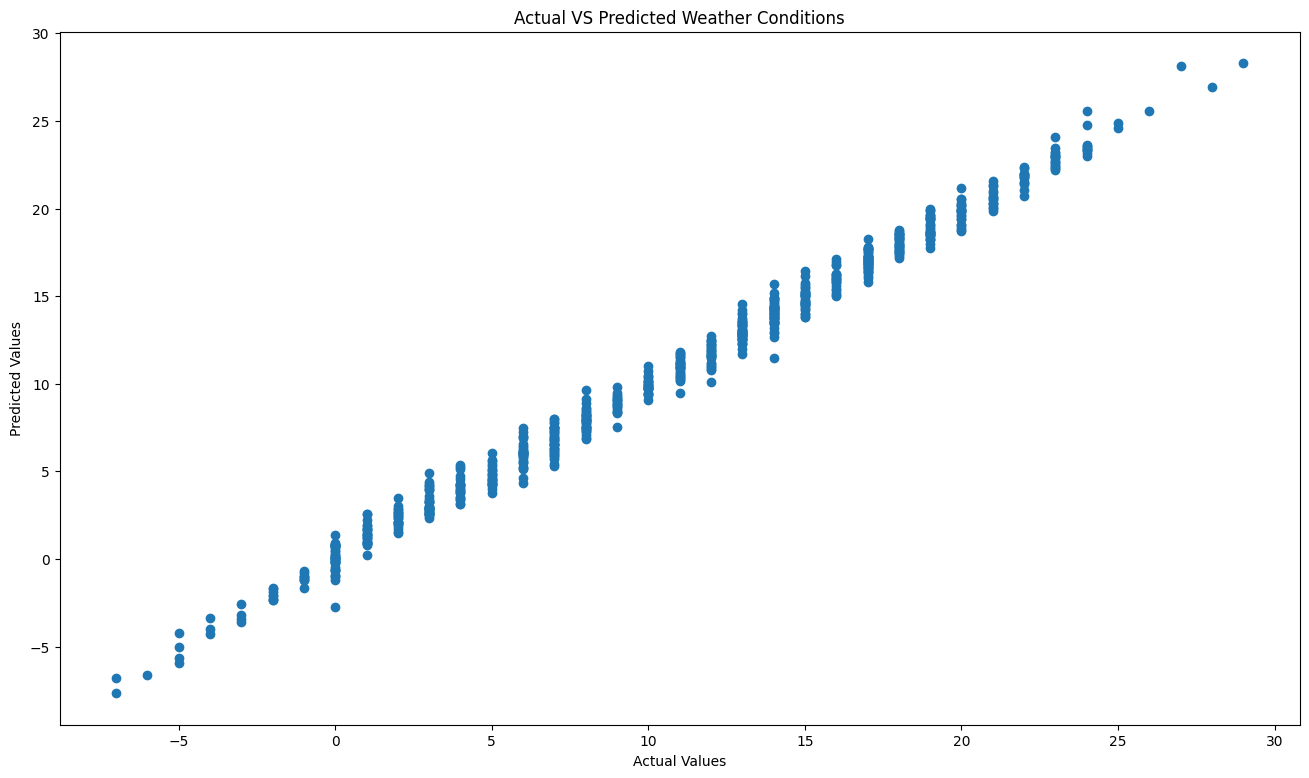

In [26]:
# Plot actual VS Predicted values
plt.figure(figsize = (16, 9))

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual VS Predicted Weather Conditions')
plt.show()

In [18]:
# lets Check minimum temperature.

y_test.min(), y_test.argmin(), y_pred.min(), y_pred.argmin()
# result almost same.

(np.int64(-7), np.int64(391), np.float64(-7.6637101444412), np.int64(391))

In [19]:
# Now lets check maximum temperature and their index.

y_test.max(), y_test.argmax(), y_pred.max(), y_test.argmax()
# result almost same.

(np.int64(29), np.int64(82), np.float64(28.296894107934307), np.int64(82))

In [20]:
# check the exact value matching the graph or not.

y_test.sort_values(ascending = False).head(3)

1320    29
1313    28
1315    27
Name: BASEL_temp_mean, dtype: int64

In [21]:
y_p = np.sort(y_pred)[::-1]
df_p = pd.DataFrame({'y_pred':y_p})
df_p.head(3)

# when we compare with testing data with prediction value, we can appx. hit the target value.

,y_pred
0,28.296894
1,28.137768
2,26.955830
